<a href="https://colab.research.google.com/github/singhnayaab/hww/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HERE WE ARE**

## **TEARY-EYED**

## **AT THE END...**

## **QUESTION 1**

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#(a)
XX = [[i for i in range(j, j+3)] for j in range(1, 8, 3)]
#LC : outer loop: j will take values 1, 4, and 7
#    : inner loop: i gives numbers of j to j+3

print(XX)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [24]:
print(np.array(XX))# converting to array for similar look

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [25]:
#(b)

last_col= [col[-1] for col in XX]

#literally just took last col using -1

print(last_col)

[3, 6, 9]


In [41]:
#(c)

#cube_mid = [3 * (col[1] ** 3) for col in XX]
#speicifc to this problem middle col
# to generalize could use n+1/2 for odd entries
# n/2 for even entries
#below is a generalized form
#both work
cube_mid = [3*col[(len(XX)// 2)-1] ** 3 if len(XX) % 2 == 0 else 3* col[((len(XX)+1) // 2)-1] ** 3 for col in XX]

print(cube_mid)

[24, 375, 1536]


## **QUESTION 2**

In [37]:
def OffDiags(N):

    ''' use outer and inner loop to define square matrix
        i is one less than j then -1.
        j is one less than i then 1.
        else,  0.  '''
    return [[-1 if i == j + 1 else 1 if j == i + 1 else 0 for j in range(N)] for i in range(N)]


#loved doing this one

result = OffDiags(6)
print(np.array(result))


[[ 0  1  0  0  0  0]
 [-1  0  1  0  0  0]
 [ 0 -1  0  1  0  0]
 [ 0  0 -1  0  1  0]
 [ 0  0  0 -1  0  1]
 [ 0  0  0  0 -1  0]]


## **QUESTION 3**

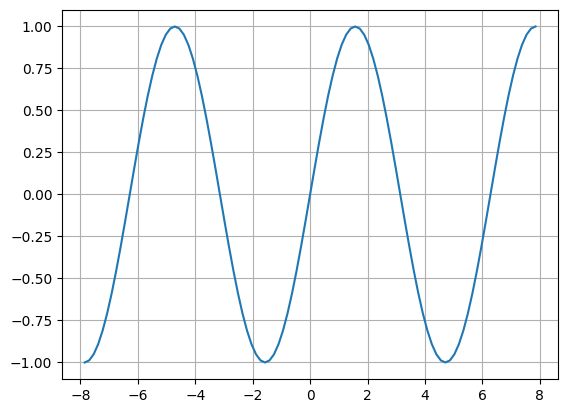

In [38]:
#sine wave with given parameters
x = np.linspace(-2.5*np.pi, 2.5*np.pi, 101)
y = np.sin(x)

#test plot()
plt.plot(x,y)
plt.grid()

In [39]:
#it's zip time
shape = ['o' if y_val < 0 else 'd' if x_val == 0 and y_val == 0 else 's' for x_val, y_val in zip(x, y)]
#shape LC

size = [100 if x_val > 0  else 30 if x_val<0 else 150 for x_val, y_val in zip(x, y)]
# size LC

color = ['r' if x_val < 0 and y_val > 0 else 'g' if x_val < 0 and y_val < 0 else 'b' if x_val == 0 and y_val == 0
         else 'g' if x_val > 0 and y_val > 0 else 'r' if x_val > 0 and y_val < 0 else 'g' for x_val, y_val in zip(x, y)]
#color LC went crazy

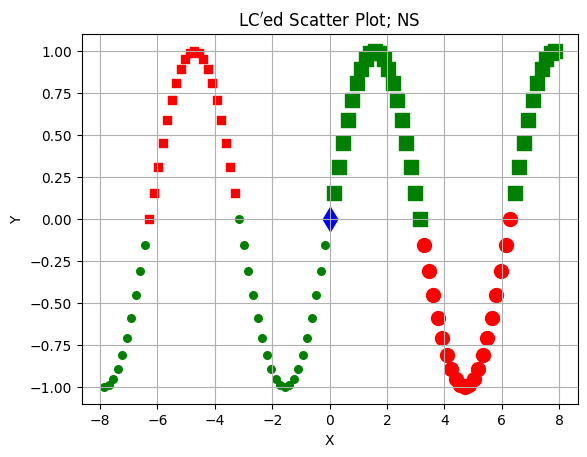

In [40]:
#zip the data together in zipped object
data = zip(x, y, shape, size, color)

#use loop to plot
for x_val, y_val, shape_val, size_val, color_val in data:
    plt.scatter(x_val, y_val, marker=shape_val, s=size_val, c=color_val)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("LC$'$ed Scatter Plot; NS")
plt.savefig('scatter_plot.png', dpi=150)
plt.grid(True)
plt.show()


## **QUESTION 4**

\begin{align*}
\frac{dy}{dt} &= t \cdot e^{-t} \\
dy &= t \cdot e^{-t} \, dt \\
\end{align*}

integration by parts time, let's take :

\
\begin{aligned}
u &= t & \quad dv &= e^{-t} \, dt \\
du &= dt & \quad v &= -e^{-t}
\end{aligned}


Applying the integration by parts formula we have:

\
\begin{aligned}
\int t \cdot e^{-t} \, dt &= -te^{-t} - \int (-e^{-t}) \cdot dt \\
&= -te^{-t} + \int e^{-t} \, dt \\
&= -te^{-t} - e^{-t} + C
\end{aligned}
\

\
Taking initial condition \(y(0) = 0\), we have \(y(t=0) = 0\). Therefore, when \(t=0\), \(y=0\), and thus:
\
\begin{aligned}
  0 =  - e^{-0} + C\\
 C=1
\end{aligned}

plugging in C

\begin{aligned}
  y = 1 - (t + 1)\cdot e^{-t} \\
\end{aligned}

yayyy





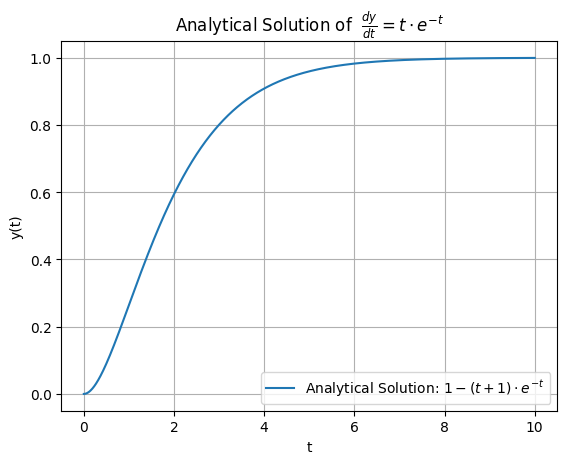

In [51]:
import numpy as np


def y(t):
    '''analytical solution of dydt'''
    return 1 - (t + 1) * np.exp(-t)


t= np.linspace(0, 10, 1001) # t array

y_ = y(t)


plt.plot(t, y_, label='Analytical Solution: $1 - (t + 1) \\cdot e^{-t}$')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Analytical Solution of  $\\frac{dy}{dt} = t \cdot e^{-t}$')
plt.grid(True)
plt.legend()
plt.show()


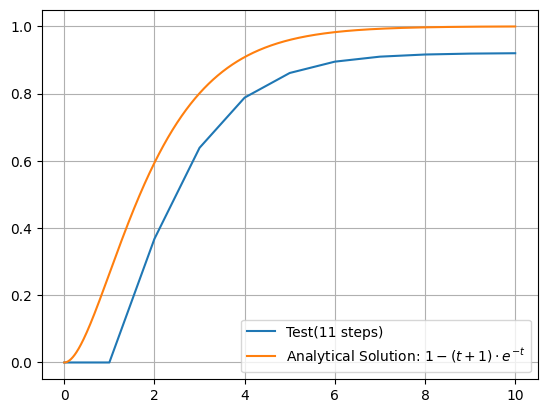

In [66]:
import numpy as np
import matplotlib.pyplot as plt


def EulerMethod(derivative_func, time, yi):
    '''
    Input:
    derivative_func: A UDF to calc derivative
    (i just wanted to try if a UDF works too)
    time: time array
    yi = intial y0

    Output:
    y: y solution of derivative func specific
    '''
    y = np.zeros_like(time)  # y initialize
    y[0] = yi # initial y assignment

    dt = time[1] - time[0] # del t

    j =0

    for j, time in enumerate(time[:-1]):

        y[j+1]= y[j] + derivative_func(time) * dt
        #y(t+dt) = yi + dy/dt * dt

    return y

def derivative_func(t):
    #derivative func given
    return t * np.exp(-t)

test_t = np.linspace(0, 10, 11) # test time with 11 steps
test = EulerMethod(derivative_func, test_t, 0)

# test plot works! similar to 11 step plot in hw

plt.plot(test_t, test, label='Test(11 steps)')
plt.plot(t, y_, label='Analytical Solution: $1 - (t + 1) \\cdot e^{-t}$')
plt.legend()
plt.grid()


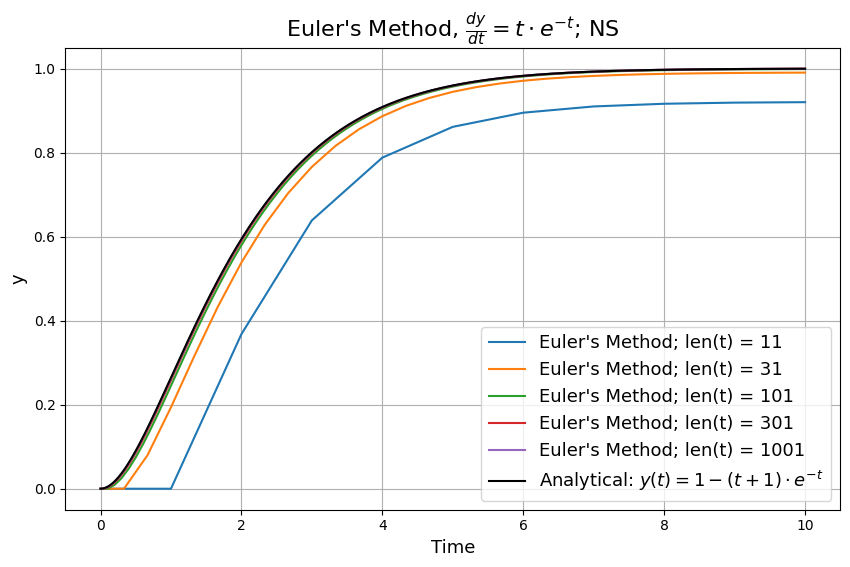

In [81]:
def plot_solutions(N_values):
    '''
    Input:

    N_values: array of N - stepsize of time array

    Output

    Plots up everything

    '''
    #plot
    plt.figure(figsize=(10, 6))
    time = np.linspace(0, 10, 1001)

    #analytical y calling def y
    analytical_y = y(time)

    # plotting individual solutions with varying N
    for N in N_values:

        time = np.linspace(0, 10, N)
        y_numerical = EulerMethod(derivative_func, time, 0)

        plt.plot(time, y_numerical, label=f'Euler\'s Method; len(t) = {N}')

    #plottng analytical explicit solution
    plt.plot(time, analytical_y, '-k', label='Analytical: $y(t) = 1 - (t + 1) \\cdot e^{-t}$',)

    plt.xlabel('Time', fontsize =13)
    plt.ylabel('y', fontsize =13)
    plt.title('Euler\'s Method, $\\frac{dy}{dt} = t \cdot e^{-t}$; NS', fontsize = 16)
    plt.legend(fontsize =13)
    plt.grid(True)
    plt.show()

# time arrays of increasing resolution
N_values = [11, 31, 101, 301, 1001]

# plot out!!!
plot_solutions(N_values)

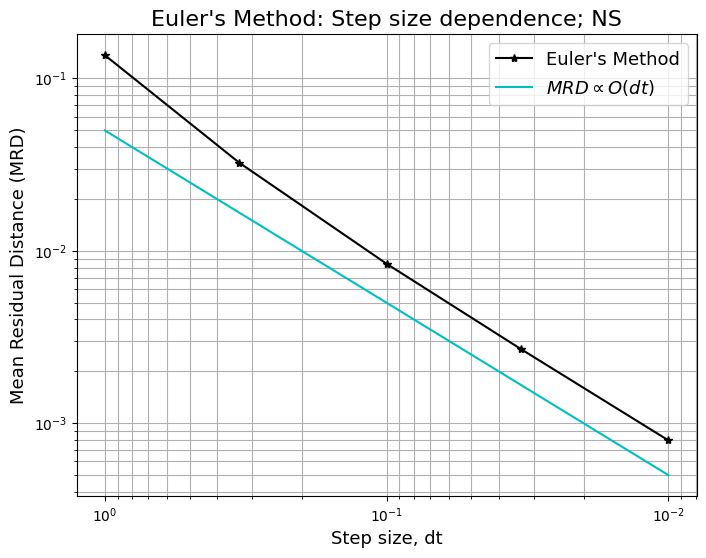

In [95]:
def MRD(analytical_y, y_num):
  '''
  Input:
  analytical_y = analytical solution
  y_num = y numerical solution

  Output:
  MRD = Mean residual distance
  '''
  SS= np.mean((analytical_y - y_num)**2)
  MRD = np.sqrt(SS)

  return MRD

#what can i say big fan of UDFs here's another one
def calculate_MRD(N_values):
    """
    Input: Nvalues

    Output:

    dt_values - del t
    MRDs - mean res distance
    """
    #initialize
    MRDs = []
    dt_values = []

    # loop to calculate and store MRDs and dts
    for N in N_values:
        time = np.linspace(0, 10, N)
        dt = time[1] - time[0]
        y_numerical = EulerMethod(derivative_func, time, 0)
        analytical_y = y(time)
        mrd = MRD(analytical_y, y_numerical)
        MRDs.append(mrd)
        dt_values.append(dt)
    return dt_values, MRDs


c = 0.05 # this one looks like the one in the figure so here we are

dt, MRDs = calculate_MRD(N_values) # call func

#linear scaling?
linear_dt = [c * dt for dt in dt]

#plot that figure
plt.figure(figsize=(8, 6))
plt.loglog(dt, MRDs, marker='*', linestyle='-', color = 'black', label = 'Euler\'s Method')
plt.loglog(dt, linear_dt, 'c',  label = '$MRD \propto O(dt)$')
plt.xlabel('Step size, dt', fontsize =13)
plt.ylabel('Mean Residual Distance (MRD)', fontsize =13)
plt.title('Euler\'s Method: Step size dependence; NS', fontsize =16)
plt.gca().invert_xaxis()
plt.legend(fontsize =13)
plt.grid(which = 'both')
plt.show()

## **THANK YOU FOR A WONDERFUL QUARTER!!!!**

## **HOPE YOU HAVE A WONDERFUL SUMMER AND TONS OF FUTZING AROUND!**